# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torch.optim as optim
from torch.optim import lr_scheduler
from torchsummary import summary
import torchvision.models as models
import torchfunc
from pytorch_hsv import HSVLoss

from sklearn import metrics
from sklearn.metrics import classification_report
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score

import copy
from PIL import Image
import os
import cv2

import gdown
from tqdm import tqdm
from skimage import io

import warnings
import shutil
import glob

from focal_loss.focal_loss import FocalLoss

In [2]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
sns.set_style("whitegrid")
sns.color_palette("flare")

torchfunc.cuda.reset()

In [3]:
# IMG_SIZE = 256
# def check(path):
#     image = io.imread(path)
#     # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     image = crop_image_from_gray(image)
#     image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
#     return image

In [ ]:
# A = []
# for file_path in tqdm(glob.glob(r"D:\Diabetic Retinopathy\HUGE DATASET\Новая папка\train\train\\" + "/*")):
#     try:
#          cv2.imwrite(file_path, check(file_path))
#     except:
#         A.append(file_path)
#         print(file_path)

In [4]:
# #d = d.drop(['194_right', '29126_right', '38790_right', '8421_left'])
d = pd.read_csv(r"D:\Diabetic Retinopathy\IOGEN_DATASET\dataset\labels.csv", index_col = [0])
d.head()

,level
image,
19840_left,2
32380_right,0
32242_right,2
32610_right,0
27041_right,0


In [5]:
PATHS = []
for file_path in tqdm(glob.glob(r"D:\Diabetic Retinopathy\IOGEN_DATASET\dataset\train_prep" + "/*")):
    PATHS.append(file_path)

100%|█████████████████████████████████████████████████████████████████████████| 7902/7902 [00:00<00:00, 3950815.38it/s]


In [7]:
PATHS.sort()

In [8]:
d = d.drop(musor)
d = d.sort_index()

In [9]:
d['path'] = PATHS

In [ ]:
# MAX_SIZE = (256, 256) 
# for file_path in tqdm(d['path']):
#     image = Image.open(file_path) 
#     image.thumbnail(MAX_SIZE) 
#     image.save(file_path) 

In [11]:
d

,level,path
image,,
10003_left,0,D:\Diabetic Retinopathy\IOGEN_DATASET\dataset\...
10010_right,0,D:\Diabetic Retinopathy\IOGEN_DATASET\dataset\...
10013_left,0,D:\Diabetic Retinopathy\IOGEN_DATASET\dataset\...
10022_right,0,D:\Diabetic Retinopathy\IOGEN_DATASET\dataset\...
10029_right,0,D:\Diabetic Retinopathy\IOGEN_DATASET\dataset\...
...,...,...
9972_left,0,D:\Diabetic Retinopathy\IOGEN_DATASET\dataset\...
9975_right,1,D:\Diabetic Retinopathy\IOGEN_DATASET\dataset\...
9976_right,1,D:\Diabetic Retinopathy\IOGEN_DATASET\dataset\...


# Import data

In [ ]:
# url = "https://drive.google.com/u/0/uc?id=1y6UKa-3hHjtp7FK5ikAeHsqIThN0J70T"

# if not os.path.isfile('dataset.tar.gz'):
#     gdown.download(url, output="dataset.tar.gz", quiet=True)
    
# if not os.path.isdir('IOGEN_DATASET'):
#     !mkdir IOGEN_DATASET
#     !tar --gunzip --extract --file="dataset.tar.gz" --directory IOGEN_DATASET
    
# PATH_TO_DATA = 'D:\Diabetic Retinopathy\HUGE DATASET\Новая папка\train\train\\'

In [ ]:
# Датасет с кэггла выгружается вручную
os. getcwd()

In [10]:
D_PATH = 'D:\Diabetic Retinopathy\\'

# Data Analysis

In [ ]:
TRAIN_IOGEN_DF = pd.read_csv(D_PATH + r'IOGEN_DATASET/dataset/labels.csv', index_col = [0])
TRAIN_KAGGLE_DF = pd.read_csv(D_PATH + r'IOGEN_DATASET/dataset/train_kaggle/kaggle_train_labels.csv', index_col = [0])
TRAIN_IND_DF = pd.read_csv(D_PATH + r'INDIAN_DATASET/2. Groundtruths/Training Labels.csv', index_col = [0]).iloc[:, :1]
TEST_IND_DF = pd.read_csv(D_PATH + r'INDIAN_DATASET/2. Groundtruths/Testing Labels.csv', index_col = [0]).iloc[:, :1]

In [ ]:
TRAIN_IOGEN_DF

In [ ]:
def countplot(dataframe):
    plt.figure(figsize=(12,6))
    splot = sns.countplot(x = 'level', data = dataframe, palette= "dark:salmon_r");
    maxim_lim = 0

    for g in splot.patches:
        ann_value = g.get_height()
        splot.annotate(format(ann_value, '.0f'),
        (g.get_x() + g.get_width() / 2., g.get_height()),
        ha = 'center', va = 'center',
        xytext = (0, 9),
        textcoords = 'offset points')
        
        if ann_value > maxim_lim:
            maxim_lim = ann_value
    plt.ylim((0, 1.1*maxim_lim))
    return

In [ ]:
countplot(d)

In [ ]:
d['level'].value_counts() / d['level'].value_counts().sum()

In [ ]:
countplot(TRAIN_IOGEN_DF)

In [ ]:
countplot(TRAIN_KAGGLE_DF)

In [ ]:
countplot(TRAIN_IND_DF)

In [ ]:
countplot(TEST_IND_DF)

In [ ]:
# TRAIN_VALUE_COUNTS = TRAIN_DF['level'].value_counts()
# TRAIN_FREQUENCY = (TRAIN_VALUE_COUNTS / TRAIN_VALUE_COUNTS.sum()).sort_index()
# TRAIN_FREQUENCY * 100

In [6]:
musor = np.unique(['3783_right', '10440_left', '15630_right', '31202_right', '33119_left', '36416_right', 
         '44088_left', '26064_left', '766_left', '5869_left', '6523_left', '6523_right', '7647_left',
        '7672_left', '7825_right', '7938_left', '8434_left', '8619_right', '8669_right', '8742_right', 
         '8762_left', '8795_left', '9205_right', '9680_left', '9689_left', '9689_right', 
        '9942_right', '9958_right', '10645_left', '10782_left', '11050_left', '11304_left', '11304_right',
        '11579_right', '11807_left', '11849_right', '12101_right', '12168_left', '12721_left', '12751_left', 
        '13304_left', '13431_right', '13458_left', '13863_right', 
        '14219_left', '14219_right', '14481_right', '15336_left', '15954_left', '16085_right', '16497_left',
        '16890_left', '17734_left', '17770_right', '17800_left', '17989_left', '18171_right', '18257_right',
        '18644_left', '20102_left', '20273_right',  '20428_left', '20670_right', '21225_right', '22026_left',
        '22687_right', '25084_left', '25360_left', '25682_left', '26064_left', '26064_right', 
         '26486_right', '26584_left', '26679_left', '26991_left', '27456_left',  '28288_left', '29139_right',
        '29432_right', '32253_right', '33119_left', '33292_right', '33655_left', '34442_right', '34689_left', '36981_right',
        '37197_right', '37608_left',  '38083_left', '39702_left', '40499_left', '40994_right',
        '41566_left', '41940_right', '42007_left', '43342_right', '43457_left', '43815_right', '43921_left', '44083_right'])

In [ ]:
d 

In [ ]:
TRAIN_IOGEN_DF = d.drop(musor)
TRAIN_IOGEN_DF

In [ ]:
# for i in musor:
#     os.remove(PATH_TO_DATA + i + '.jpeg')

# **DATA PREPARATION**

In [ ]:
IMG_SIZE = 256

def crop_image1(img,tol=7):
    # img is image data
    # tol  is tolerance
        
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

def load_ben_color(path, sigmaX=10):
    image = io.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image=cv2.addWeighted (image, 4, cv2.GaussianBlur( image , (0,0) , sigmaX) , -4 ,128)       
    return image

In [ ]:
glob.glob(D_PATH + D_PATH + "INDIAN_DATASET\Original Images\Training Set\\" + "/*")

In [ ]:
INDIAN_NAMES = [file_path for file_path in glob.glob(D_PATH + "INDIAN_DATASET\Original Images\Training Set\\" + "/*")]
INDIAN_PICTURE_NUMBERS = [os.path.basename(name).split('.')[0] for name in INDIAN_NAMES]

In [ ]:
TRAIN_IND_DF[TRAIN_IND_DF['level'] != 0].index

In [ ]:
for pn in tqdm(INDIAN_PICTURE_NUMBERS):
    if pn in TRAIN_IND_DF[TRAIN_IND_DF['level'] != 0].index:
        img = load_ben_color(D_PATH + "INDIAN_DATASET\Original Images\Training Set\\" + pn +".jpg")
        cv2.imwrite(D_PATH + 'IOGEN_DATASET/dataset/train_prep/' + pn + '.jpeg', img)

In [11]:
names = [file_path for file_path in glob.glob(D_PATH + 'IOGEN_DATASET/dataset/train_prep/' + "/*")]
picture_numbers = [os.path.basename(name).split('.')[0] for name in names]
names[:3], picture_numbers[:3]

(['D:\\Diabetic Retinopathy\\IOGEN_DATASET/dataset/train_prep\\10003_left.jpeg',
  'D:\\Diabetic Retinopathy\\IOGEN_DATASET/dataset/train_prep\\10010_right.jpeg',
  'D:\\Diabetic Retinopathy\\IOGEN_DATASET/dataset/train_prep\\10013_left.jpeg'],
 ['10003_left', '10010_right', '10013_left'])

In [ ]:
# for pn in tqdm(picture_numbers):
#     img = load_ben_color('IOGEN_DATASET/dataset/train/' + pn + '.jpeg')
#     cv2.imwrite('IOGEN_DATASET/dataset/train_prep/' + pn + '.jpeg', img)

In [ ]:
# add_img_names = TEST_DF[TEST_DF['level'] != 0].index
# add_img_names

In [ ]:
# for pn in tqdm(add_img_names):
#     img = load_ben_color('IOGEN_DATASET/dataset/test/test_images/' + pn + '.png')
#     cv2.imwrite('IOGEN_DATASET/dataset/train_prep/' + pn + '.jpeg', img)

# **Data preprocessing.**

In [ ]:
# labels_df = pd.read_csv(r'IOGEN DATASET FOR CROPPING/labels.csv', index_col = [0])
# labels_df = labels_df.drop(musor)
# labels_df

Check dublicates.

In [ ]:
# if len(labels_df) == len(labels_df.index.unique()):
#   print('There are no dublicates')
# else:
#   print('There are dublicates')

In [ ]:
# names_indexes = labels_df.index.to_list()
# positions = [pos.split('_')[-1] for pos in names_indexes]
# labels_df['Position'] = positions
# LR, LR_counts = np.unique(positions, return_counts = True)
# print(f'There are {LR_counts[0]} {LR[0]} eyes.')
# print(f'There are {LR_counts[1]} {LR[1]} eyes.')

In [ ]:
# all_labels = labels_df['level'].to_numpy()
# unique_labels, labels_counts = np.unique(all_labels, return_counts = True)
# unique_labels, labels_counts

In [ ]:
# plt.figure(figsize=(12,6))
# splot = sns.countplot(x = 'level', data = labels_df);

# for g in splot.patches:
#     splot.annotate(format(g.get_height(), '.0f'),
#                    (g.get_x() + g.get_width() / 2., g.get_height()),
#                    ha = 'center', va = 'center',
#                    xytext = (0, 9),
#                    textcoords = 'offset points')

# plt.ylim((0,6400));

In [ ]:
plt.figure(figsize=(12,6))
splot = sns.countplot(x = 'level', data = labels_df, hue = 'Position');

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.ylim((0,3300));

# Поиск некачественных фотографий.

### Мусор

In [ ]:
musor = ['3783_right', '10440_left', '15630_right', '31202_right', '33119_left', '36416_right', 
         '44088_left', '26064_left', '766_left', '5869_left', '6523_left', '6523_right', '7647_left',
        '7672_left', '7825_right', '7938_left', '8434_left', '8619_right', '8669_right', '8742_right', 
         '8762_left', '8795_left', '9205_right', '9680_left', '9689_left', '9689_right', 
        '9942_right', '9958_right', '10645_left', '10782_left', '11050_left', '11304_left', '11304_right',
        '11579_right', '11807_left', '11849_right', '12101_right', '12168_left', '12721_left', '12751_left', 
        '13304_left', '13431_right', '13458_left', '13863_right', 
        '14219_left', '14219_right', '14481_right', '15336_left', '15954_left', '16085_right', '16497_left',
        '16890_left', '17734_left', '17770_right', '17800_left', '17989_left', '18171_right', '18257_right',
        '18644_left', '20102_left', '20273_right',  '20428_left', '20670_right', '21225_right', '22026_left',
        '22687_right', '25084_left', '25360_left', '25682_left', '26064_left', '26064_right', 
         '26486_right', '26584_left', '26679_left', '26991_left', '27456_left',  '28288_left', '29139_right',
        '29432_right', '32253_right', '33119_left', '33292_right', '33655_left', '34442_right', '34689_left', '36981_right',
        '37197_right', '37608_left',  '38083_left', '39702_left', '40499_left', '40994_right',
        '41566_left', '41940_right', '42007_left', '43342_right', '43457_left', '43815_right', '43921_left', '44083_right']

musor = np.unique(musor)
len(musor)

In [ ]:
rows = 1
cols = 5
samples = rows*cols

idx = np.random.randint(0, len(musor), samples)
figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(14, 10))
for i in range(samples):
    lab = labels_df.loc[musor[i]]['level']
    ax.ravel()[i].imshow(Image.open('IOGEN DATASET/train/' + musor[i] + '.jpeg'))
    ax.ravel()[i].set_axis_off()
    ax.ravel()[i].set_title('Level '+ str(lab))
plt.tight_layout(pad=1)
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
splot = sns.countplot(x = 'level', data = labels_df.loc[musor], hue = 'Position');

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

In [ ]:
if not os.path.isdir('Musor'):
    !mkdir Musor
    destination_directory = 'Musor/'
    full_paths = [image_folder_path + '/' + pic + '.jpeg' for pic in musor]
    for file_path in full_paths:
        shutil.move(file_path, destination_directory)      

In [ ]:
labels_df = labels_df.drop(musor)

In [ ]:
labels_df.shape

### Recising images

In [ ]:
def recise_image(full_path):
    img = Image.open(full_path)
    img.thumbnail((256, 256))
    img.save(full_path)

In [ ]:
ls = labels_df.index.values.astype('str')
len(ls), ls

In [ ]:
for l in tqdm(ls):
    recise_image(image_folder_path + '/' + l + '.jpeg')

In [ ]:
#image_folder_path = 'IOGEN DATASET FOR CROPPING/train'

def vertical_mirror_image(eye_name, directory):

    full_path = directory + '/' + eye_name + '.jpeg'
    image_name = eye_name.split('_')

    image = Image.open(full_path)
    mirrored_image = image.transpose(Image.FLIP_LEFT_RIGHT)

    #mirrored_image.save('/content/dataset/train/' + image_name[0] + '_' + mirror_name + '.jpeg')
    mirrored_image.save('VertData/V' + eye_name + '.jpeg')

In [ ]:
def horizontal_mirror_image(eye_name, directory):

    full_path = directory + '/' + eye_name + '.jpeg'

    image = Image.open(full_path)
    mirrored_image = image.transpose(Image.FLIP_TOP_BOTTOM)

    mirrored_image.save('HorizData/H' + eye_name + '.jpeg')

In [ ]:
harm_labels_df = labels_df[labels_df['level'] != 0].reset_index()
harm_labels_df.head()

In [ ]:
!mkdir VertData
names, lvls, ps = [], [], []
for img, lvl, p in tqdm(zip(harm_labels_df['image'], harm_labels_df['level'], harm_labels_df['Position'])):

    vertical_mirror_image(img, image_folder_path)

    names.append('V'+img)
    lvls.append(lvl)

    if p == 'left':
        ps.append('right')
    elif p == 'right':
        ps.append('left')

In [ ]:
pure_labels_df = labels_df.reset_index()
vertical_flipped_df = pd.DataFrame({'image': names, 'level': lvls, 'Position': ps})
extended_labels_df = pd.concat([pure_labels_df, vertical_flipped_df], ignore_index = True)
extended_labels_df

In [ ]:
plt.figure(figsize=(7,5))
splot = sns.countplot(x = 'level', data = extended_labels_df, hue = 'Position');

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.ylim((0,3300));

In [ ]:
!mkdir HorizData
names, lvls, ps = [], [], []
for img, lvl, p in tqdm(zip(harm_labels_df['image'], harm_labels_df['level'], harm_labels_df['Position'])):

    horizontal_mirror_image(img, image_folder_path)

    names.append('H'+img)
    lvls.append(lvl)
    ps.append(p)

In [ ]:
horizontal_flipped_df = pd.DataFrame({'image':names, 'level': lvls, 'Position': ps})
extended_labels_df = pd.concat([extended_labels_df, horizontal_flipped_df], ignore_index = True)
extended_labels_df

In [ ]:
plt.figure(figsize=(7,5))
splot = sns.countplot(data = extended_labels_df, x = 'level', hue = 'Position');

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.ylim((0,3300));

In [ ]:
names, lvls, ps = [], [], []
for img, lvl, p in tqdm(zip(vertical_flipped_df['image'], vertical_flipped_df['level'], vertical_flipped_df['Position'])):

    horizontal_mirror_image(img, 'VertData')

    names.append('H'+img)
    lvls.append(lvl)
    ps.append(p)

In [ ]:
horizontal_vertical_flipped_df = pd.DataFrame({'image':names, 'level': lvls, 'Position': ps})
extended_labels_df = pd.concat([extended_labels_df, horizontal_vertical_flipped_df], ignore_index = True)
extended_labels_df

In [ ]:
plt.figure(figsize=(7,5))
splot = sns.countplot(data = extended_labels_df, x = 'level', hue = 'Position');

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.ylim((0,3300));

In [ ]:
if not os.path.isdir('MyDatasetBEN') :
    !mkdir MyDatasetBEN
    directory_names = ['IOGEN DATASET FOR CROPPING/train', 'VertData', 'HorizData']
    destination_directory = 'MyDatasetBEN/'
    for dir in directory_names:
        for file_path in tqdm(glob.glob(dir + "/*.jpeg")):
            try:
                shutil.move(file_path, destination_directory)
            except:
                pass

In [ ]:
# shutil.rmtree('HorizData', ignore_errors=True)
# shutil.rmtree('VertData', ignore_errors=True)

In [15]:
#directory_name = 'MyDatasetNew'
D_PATH = 'D:\Diabetic Retinopathy\\'
directory_name = D_PATH + 'IOGEN_DATASET/dataset/train_prep'
names = [file_path for file_path in glob.glob(directory_name + "/*")]
picture_numbers = [os.path.basename(name).split('.')[0] for name in names]
names[:3], picture_numbers[:3]

(['D:\\Diabetic Retinopathy\\IOGEN_DATASET/dataset/train_prep\\10003_left.jpeg',
  'D:\\Diabetic Retinopathy\\IOGEN_DATASET/dataset/train_prep\\10010_right.jpeg',
  'D:\\Diabetic Retinopathy\\IOGEN_DATASET/dataset/train_prep\\10013_left.jpeg'],
 ['10003_left', '10010_right', '10013_left'])

In [16]:
len(names)

7902

In [ ]:
# extended_labels_df = extended_labels_df.set_index(extended_labels_df.columns[0])
# extended_labels_df

In [ ]:
add_df = pd.read_csv(r'KaggleRandomDataset\train.csv', index_col = [0])
add_df

In [ ]:
add_harm = add_df[add_df['level'] != 0]

In [ ]:
for i in tqdm(add_harm.index):
    try:
        ben_image = load_ben_color('KaggleRandomDataset/train_images/' + i + '.png')
        cv2.imwrite('KaggleRandomDataset/train_ben/' + i + '.png', ben_image)
    except:
        print(i)
        add_harm.drop(i)

In [ ]:
extended_labels_df = pd.concat([labels_df, add_harm])
extended_labels_df['level'] = extended_labels_df['level'].astype('int')
extended_labels_df = extended_labels_df[extended_labels_df['level'] > -1]
extended_labels_df

In [ ]:
labels_l = extended_labels_df['level'].to_dict()
labels_l

In [ ]:
plt.figure(figsize=(7,5))
splot = sns.countplot(data = extended_labels_df, x = 'level');

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

#plt.ylim((0,3300));

In [ ]:
FULL_TRAIN_DF = pd.concat([TRAIN_IOGEN_DF, 
                           TRAIN_KAGGLE_DF[TRAIN_KAGGLE_DF['level'] != 0],
                           TRAIN_IND_DF[TRAIN_IND_DF['level'] != 0]])

# Model

In [ ]:
#TRAIN_DF = TRAIN_IOGEN_DF.drop(musor)
TRAIN_DF = TRAIN_DF.sort_index()
TRAIN_DF['path'] = names
# ADD_TRAIN_DF = TEST_DF[TEST_DF['level'] != 0]
# FULL_TRAIN_DF = pd.concat([TRAIN_DF, ADD_TRAIN_DF])
TRAIN_LABELS = TRAIN_DF['level'].to_dict()
# # #TRAIN_LABELS

# FULL_TRAIN_DF

In [17]:
# directory_name = D_PATH + 'dataset\train_prep\\'
# names = [file_path for file_path in glob.glob(directory_name + "9984_left.jpg")]
# picture_numbers = [os.path.basename(name).split('.')[0] for name in names]
# names[:3], picture_numbers[:3]

In [ ]:
directory_name + "/*"

In [ ]:
names.sort()

In [ ]:
a = []
for i, v in enumerate(picture_numbers):
    if v in FULL_TRAIN_DF.index:
        a.append(i)

In [ ]:
FULL_TRAIN_DF

In [ ]:
FULL_TRAIN_DF['path'] = [names[i] for i in a]

In [ ]:
FULL_TRAIN_DF.to_csv('UNION LABELS.csv')

In [ ]:
len(FULL_TRAIN_DF)

In [ ]:
FULL_TRAIN_DF = pd.concat([FULL_TRAIN_DF[FULL_TRAIN_DF['level'] == 0].sample(2319),
                           FULL_TRAIN_DF[FULL_TRAIN_DF['level'] != 0]])

In [ ]:
countplot(FULL_TRAIN_DF)

In [17]:
TRAIN_LABELS = d['level'].to_dict()
#TRAIN_LABELS = d['level'].to_dict()

In [18]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.Grayscale(num_output_channels = 3),
        transforms.Normalize(mean=mean, std=std),
    ]),
    
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.CenterCrop(224),
        transforms.Grayscale(num_output_channels=3),
        transforms.Normalize(mean=mean, std=std), 
    ]),
    
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.CenterCrop(224),
        #transforms.Normalize(mean=mean, std=std),
    ])
}
                     

In [19]:
class EyesDataset(Dataset):
    def __init__(self, image_paths, transform=False, minor = None):
        self.image_paths = image_paths
        self.transform = transform
        self.minor = minor

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_filepath = self.image_paths[idx]
        l = TRAIN_LABELS[os.path.basename(image_filepath).split('.')[0]]
        if self.transform is not None:
            image = Image.open(image_filepath)
            image = self.transform(image)
            
        # if self.minor is not None and l != 0:
        #     image = self.minor(image)
        #print(image.shape)
        return image, l

In [20]:
def equal_sampler(dataset, val_size):
    
    classes = dataset['level'].unique()
    train_path, val_path = [], []
    
    for c in classes:
        c_df = dataset[dataset['level'] == c]
        c_idx = c_df.sample(int((1-val_size)*c_df.shape[0]))
        c_idx = c_idx.index
        train_path.extend(c_df.loc[c_idx]['path'].values)
        c_df = c_df.drop(c_idx, axis = 0)
        val_path.extend(c_df['path'].values)
        
    return train_path, val_path

In [21]:
random.shuffle(names)

VAL_SIZE = 0.3
BATCH_SIZE = 16

train_image_paths, valid_image_paths = equal_sampler(d, VAL_SIZE)

train_dataset = EyesDataset(train_image_paths, transform['train'], None)
valid_dataset = EyesDataset(valid_image_paths, transform['val'], None)

train_loader = DataLoader(
    train_dataset, batch_size=BATCH_SIZE, shuffle=True
)

valid_loader = DataLoader(
    valid_dataset, batch_size=BATCH_SIZE, shuffle=True
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


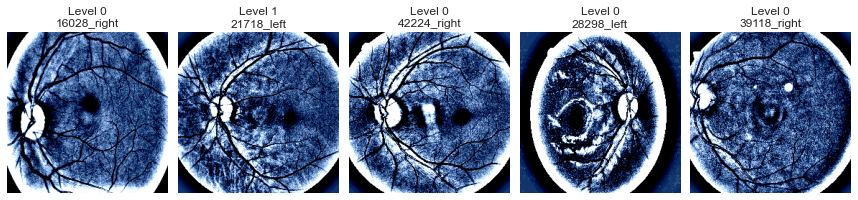

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


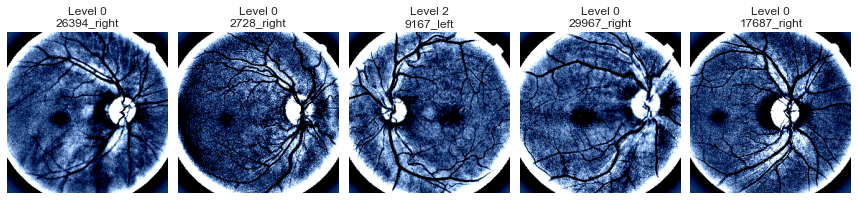

In [22]:
def visualize_augmentations(dataset, image_paths, idx=0, samples=5, cols=5, random_img = False):

    dataset = copy.deepcopy(dataset)
    rows = samples // cols

    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 8))
    for i in range(samples):
        if random_img:
            idx = np.random.randint(1,len(image_paths))
        image, lab = dataset[idx]
        print(image.shape)
        ax.ravel()[i].imshow(image.permute(1, 2, 0))
        ax.ravel()[i].set_axis_off()
        ax.ravel()[i].set_title('Level '+ str(lab) + '\n' + image_paths[idx].split('\\')[-1][:-5])
    plt.tight_layout(pad=1)
    plt.show()

visualize_augmentations(train_dataset, train_image_paths, np.random.randint(1,len(train_image_paths)), random_img = True)
visualize_augmentations(valid_dataset, valid_image_paths, np.random.randint(1,len(valid_image_paths)), random_img = True)

In [195]:
model_ft0 = models.resnext50_32x4d(pretrained=True)
for param in model_ft0.parameters():
    param.requires_grad = False

model_ft = models.efficientnet_b0(pretrained = True)
for param in model_ft.parameters():
    param.requires_grad = False
    
model_ft2 = models.resnet18(pretrained = True)
for param in model_ft2.parameters():
    param.requires_grad = False
    
model_ft3 = models.vgg11(pretrained = True)
for param in model_ft3.parameters():
    param.requires_grad = False
    
model_ft4 = models.densenet201(pretrained=True)
for param in model_ft4.parameters():
    param.requires_grad = False

#model_ft = models.resnext101_64x4d(pretrained=True)
#model_ft = models.resnet50(pretrained = True)
#model_ft = models.densenet121(pretrained = True)
#model_ft = models.inception_v3(pretrained=True)
#model_ft = models.vgg19(pretrained = True)

In [196]:
model_ft4.classifier = nn.Sequential(nn.Linear(1920, 1024),
                                     nn.BatchNorm1d(1024),
                                     nn.LeakyReLU(),
                                     nn.Dropout(0.5),
                                     
                                     nn.Linear(1024, 512),
                                     nn.BatchNorm1d(512),
                                     nn.LeakyReLU(),
                                     nn.Dropout(0.5),
                                    
                                     nn.Linear(512, 256),
                                     nn.BatchNorm1d(256),
                                     nn.LeakyReLU(),
                                     nn.Dropout(0.2),
                                    
                                     nn.Linear(256, 64),
                                     nn.BatchNorm1d(64),
                                     nn.LeakyReLU(),
                                     nn.Dropout(0.2),
                                    
                                     nn.Linear(64, 5))

In [197]:
model_ft.classifier = nn.Sequential(nn.Linear(1280, 1024),
                                     nn.BatchNorm1d(1024),
                                     nn.LeakyReLU(),
                                     nn.Dropout(0.5),
                                     
                                     nn.Linear(1024, 512),
                                     nn.BatchNorm1d(512),
                                     nn.LeakyReLU(),
                                     nn.Dropout(0.5),
                                    
                                     nn.Linear(512, 256),
                                     nn.BatchNorm1d(256),
                                     nn.LeakyReLU(),
                                     nn.Dropout(0.2),
                                    
                                     nn.Linear(256, 64),
                                     nn.BatchNorm1d(64),
                                     nn.LeakyReLU(),
                                     nn.Dropout(0.2),
                                    
                                     nn.Linear(64, 5))

In [198]:
#model_ft4

In [199]:
#summary(model_ft4, (3, 224, 224), verbose = False)

In [200]:
model_ft0.fc = nn.Sequential(nn.Linear(2048, 1024),
                                     nn.BatchNorm1d(1024),
                                     nn.LeakyReLU(),
                                     nn.Dropout(0.5),
                                     
                                     nn.Linear(1024, 512),
                                     nn.BatchNorm1d(512),
                                     nn.LeakyReLU(),
                                     nn.Dropout(0.5),
                                    
                                     nn.Linear(512, 256),
                                     nn.BatchNorm1d(256),
                                     nn.LeakyReLU(),
                                     nn.Dropout(0.2),
                                    
                                     nn.Linear(256, 64),
                                     nn.BatchNorm1d(64),
                                     nn.LeakyReLU(),
                                     nn.Dropout(0.2),
                                    
                                     nn.Linear(64, 5))

In [201]:
# resnext = nn.Sequential(*(list(model_ft.children())[:-1]))
# resnext

#densenet = nn.Sequential(*(list(model_ft.children())[:-1]))
#densenet

# vgg = nn.Sequential(*(list(model_ft.children())[:-1]))
# vgg

# inceptionV3 = nn.Sequential(*(list(model_ft.children())[:-1]))
# inceptionV3

# effnetb0 = nn.Sequential(*(list(model_ft.children())[:-1]))
# effnetb0

effnetb0 = nn.Sequential(*(list(model_ft.children())[:-1]))
#resnet = nn.Sequential(*(list(model_ft2.children())[:-1]))
#vgg = nn.Sequential(*(list(model_ft3.children())[:-1]))
densenet = nn.Sequential(*(list(model_ft4.children())[:-1]))
resnext = nn.Sequential(*(list(model_ft0.children())[:-1]))

In [202]:
class EffModel(nn.Module):
    def __init__(self, feature_extractor, num_classes = 5):
        super(EffModel, self).__init__()

        self.conv_layers = nn.Sequential(
            feature_extractor,
            nn.Flatten()
        )
        self.fc_layers = nn.Sequential(
    
            nn.Linear(1280, 1024),
            nn.BatchNorm1d(1024),
            nn.SiLU(),
            nn.Dropout(0.5),
            
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.SiLU(),
            nn.Dropout(0.3),
            
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.SiLU(),
            nn.Dropout(0.3),
            
            nn.Linear(256, 64),
            nn.BatchNorm1d(64),
            nn.SiLU(),
            nn.Dropout(0.1),
            
            nn.Linear(64, num_classes),
            )

    def forward(self, x):
        conv_output = self.conv_layers(x)
        output = self.fc_layers(conv_output)
        return output
    
    
# class ResModel(nn.Module):
#     def __init__(self, feature_extractor, num_classes = 5):
#         super(ResModel, self).__init__()

#         self.conv_layers = nn.Sequential(
#             feature_extractor,
#             nn.Flatten()
#         )
#         self.fc_layers = nn.Sequential(
            
#             nn.Linear(512, 256),
#             nn.BatchNorm1d(256),
#             nn.ReLU(),
#             nn.Dropout(0.3),
            
#             nn.Linear(256, 128),
#             nn.BatchNorm1d(128),
#             nn.ReLU(),
#             nn.Dropout(0.2),
            
#             nn.Linear(128, 64),
#             nn.BatchNorm1d(64),
#             nn.ReLU(),
#             nn.Dropout(0.2),
            
#             nn.Linear(64, num_classes),
#             )

#     def forward(self, x):
#         conv_output = self.conv_layers(x)
#         output = self.fc_layers(conv_output)
#         return output
    
# class VGGModel(nn.Module):
#     def __init__(self, feature_extractor, num_classes = 5):
#         super(VGGModel, self).__init__()

#         self.conv_layers = nn.Sequential(
#             feature_extractor,
#             nn.Flatten()
#         )
#         self.fc_layers = nn.Sequential(

#             nn.Linear(25088, 256),
#             nn.BatchNorm1d(256),
#             nn.ReLU(),
            
#             nn.Linear(256, num_classes),
#         )

#     def forward(self, x):
#         conv_output = self.conv_layers(x)
#         output = self.fc_layers(conv_output)
#         return output
    
class ResXModel(nn.Module):
    def __init__(self, feature_extractor, num_classes = 5):
        super(ResXModel, self).__init__()

        self.conv_layers = nn.Sequential(
            feature_extractor,
            nn.Flatten()
        )
        self.fc_layers = nn.Sequential(

            nn.Linear(2048, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(256, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(64, num_classes),
        )

    def forward(self, x):
        conv_output = self.conv_layers(x)
        output = self.fc_layers(conv_output)
        return output
    
class DensModel(nn.Module):
    def __init__(self, feature_extractor, num_classes = 5):
        super(DensModel, self).__init__()

        self.conv_layers = nn.Sequential(
            feature_extractor,
            nn.Flatten()
        )
        self.fc_layers = nn.Sequential(

            nn.Linear(1920, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(),
            nn.Dropout(0.1),
                    
            nn.Linear(64, num_classes),
        )

    def forward(self, x):
        conv_output = self.conv_layers(x)
        output = self.fc_layers(conv_output)
        return output
    

class CombinedModel(nn.Module):
    def __init__(self, model1, model2):
        super(CombinedModel, self).__init__()
        self.model1 = model1
        self.model2 = model2
        #self.model3 = model3
        
        self.softmax = nn.Softmax(dim = -1)
        
    def forward(self, x):
        out1 = self.model1(x)
        out2 = self.model2(x)
        #out3 = self.model3(x)
        
        out = (out1 + out2)/2
        out = self.softmax(out)
        return out
    
    
model = CombinedModel(model_ft4, model_ft).to(device)

In [203]:
summary(model, (3, 224, 224), verbose = False)

Layer (type:depth-idx)                        Output Shape              Param #
├─DenseNet: 1-1                               [-1, 5]                   --
|    └─Sequential: 2-1                        [-1, 1920, 7, 7]          --
|    |    └─Conv2d: 3-1                       [-1, 64, 112, 112]        (9,408)
|    |    └─BatchNorm2d: 3-2                  [-1, 64, 112, 112]        (128)
|    |    └─ReLU: 3-3                         [-1, 64, 112, 112]        --
|    |    └─MaxPool2d: 3-4                    [-1, 64, 56, 56]          --
|    |    └─_DenseBlock: 3-5                  [-1, 256, 56, 56]         (335,040)
|    |    └─_Transition: 3-6                  [-1, 128, 28, 28]         (33,280)
|    |    └─_DenseBlock: 3-7                  [-1, 512, 28, 28]         (919,680)
|    |    └─_Transition: 3-8                  [-1, 256, 14, 14]         (132,096)
|    |    └─_DenseBlock: 3-9                  [-1, 1792, 14, 14]        (8,071,680)
|    |    └─_Transition: 3-10                 [-1, 

In [121]:
class FundusCNN(nn.Module):
    def __init__(self, num_classes = 5):
        super(FundusCNN, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Flatten()
        )
            
        self.fc_layers = nn.Sequential(
    
            nn.Linear(128*7*7, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
        
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
        
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(),
            nn.Dropout(0.1),
        
            nn.Linear(64, num_classes),
            nn.Softmax(dim=-1)
            )


    def forward(self, x):
        conv_output = self.conv_layers(x)
        output = self.fc_layers(conv_output)
        return output
    
#model = FundusCNN().to(device)

In [204]:
frequency = d['level'].to_numpy()
#frequency = labels_df['level'].to_numpy()
frequency = np.unique(frequency, return_counts = True)
class_weigths = frequency[1].sum() / frequency[1]

In [205]:
class_weigths = class_weigths / class_weigths.sum()
class_weigths = torch.from_numpy(class_weigths).to(device)

In [206]:
class_weigths = class_weigths.float().cuda()
class_weigths

tensor([0.0119, 0.1325, 0.0586, 0.3479, 0.4490], device='cuda:0')

In [207]:
# params = [{"params": model.conv_layers.parameters(), "lr": 1e-4},
#          {"params": model.fc_layers.parameters()}]

In [208]:
#loss_fn = nn.NLLLoss(weight=class_weigths, reduction='mean')
#loss_fn = nn.CrossEntropyLoss(weight=class_weigths, reduction = 'mean')
loss_fn = FocalLoss(weights=class_weigths, gamma = 2)
#loss_fn = nn.SmoothL1Loss(size_average=16, reduction = 'mean')
optimizer = optim.AdamW(params=model.parameters(), lr=1e-3, weight_decay = 1e-2)
#optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay = 1e-2)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size = 3, gamma = 0.5)

In [209]:
n_epochs = 50
train_losses, valid_losses = [], []
acc_scores = []
f1_scores = []

for epoch in range(n_epochs):

    print(f'➤ EPOCH {epoch+1}/{n_epochs}.\n')
    
    running_loss = 0
    model.train()

    for inputs, labels in tqdm(train_loader, desc = 'Training loop'):
        
        inputs, labels = inputs.to(device), labels.to(device)
        y_pred = model(inputs)

        loss = loss_fn(y_pred, labels)
        running_loss += loss.item() * inputs.size(0)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    running_loss = running_loss/len(train_loader.sampler)
    train_losses.append(running_loss)

    all_pred_labels = []
    all_true_labels = []
    valid_loss = 0

    model.eval()
    with torch.no_grad():
        for inputs, labels in tqdm(valid_loader, desc = 'Validation loop'):

            inputs, labels = inputs.to(device), labels.to(device)
            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)
            valid_loss += loss.item() * inputs.size(0)

            _, pred_labels = torch.max(y_pred, 1)

            labels = labels.cpu().detach().numpy()
            pred_labels = pred_labels.cpu().detach().numpy()

            all_pred_labels.extend(pred_labels)
            all_true_labels.extend(labels)
    
        
    valid_loss = valid_loss/len(valid_loader.sampler)
    valid_losses.append(valid_loss)
    exp_lr_scheduler.step()

    acc = metrics.balanced_accuracy_score(all_true_labels, all_pred_labels)
    f1 = metrics.f1_score(all_true_labels, all_pred_labels, average = 'weighted')
    P = metrics.precision_score(all_true_labels, all_pred_labels, average = 'weighted')
    R = metrics.recall_score(all_true_labels, all_pred_labels, average = 'weighted')
    rep = metrics.classification_report(all_true_labels, all_pred_labels)
    
    acc_scores.append(acc)
    f1_scores.append(f1)
   
    print('------------------------------')
    print("Accuracy = {:.5f}.".format(acc))
    print("F1-score = {:.5f}.".format(f1))
    print("Precision = {:.5f}.".format(P))
    print("Recall = {:.5f}.".format(R))
    print('------------------------------')
    print(rep)
    print('------------------------------')
    print("Train loss = {:.5f}.".format(running_loss))
    print("Validation loss = {:.5f}.\n".format(valid_loss))

➤ EPOCH 1/50.



Validation loop: 100%|███████████████████████████████████████████████████████████████| 149/149 [01:24<00:00,  1.77it/s]


------------------------------
Accuracy = 0.38391.
F1-score = 0.38700.
Precision = 0.66385.
Recall = 0.32069.
------------------------------
              precision    recall  f1-score   support

           0       0.84      0.31      0.45      1751
           1       0.07      0.25      0.11       158
           2       0.22      0.36      0.27       357
           3       0.10      0.68      0.17        60
           4       0.09      0.32      0.14        47

    accuracy                           0.32      2373
   macro avg       0.26      0.38      0.23      2373
weighted avg       0.66      0.32      0.39      2373

------------------------------
Train loss = 0.92795.
Validation loss = 0.79989.

➤ EPOCH 2/50.



Validation loop: 100%|███████████████████████████████████████████████████████████████| 149/149 [01:25<00:00,  1.75it/s]


------------------------------
Accuracy = 0.39792.
F1-score = 0.51476.
Precision = 0.66455.
Recall = 0.45301.
------------------------------
              precision    recall  f1-score   support

           0       0.83      0.48      0.61      1751
           1       0.08      0.25      0.12       158
           2       0.22      0.42      0.29       357
           3       0.37      0.27      0.31        60
           4       0.17      0.57      0.26        47

    accuracy                           0.45      2373
   macro avg       0.34      0.40      0.32      2373
weighted avg       0.66      0.45      0.51      2373

------------------------------
Train loss = 0.78219.
Validation loss = 0.76300.

➤ EPOCH 3/50.



Validation loop: 100%|███████████████████████████████████████████████████████████████| 149/149 [01:24<00:00,  1.77it/s]


------------------------------
Accuracy = 0.40656.
F1-score = 0.58170.
Precision = 0.65358.
Recall = 0.53729.
------------------------------
              precision    recall  f1-score   support

           0       0.82      0.64      0.72      1751
           1       0.07      0.15      0.10       158
           2       0.23      0.22      0.22       357
           3       0.14      0.50      0.22        60
           4       0.17      0.53      0.26        47

    accuracy                           0.54      2373
   macro avg       0.29      0.41      0.30      2373
weighted avg       0.65      0.54      0.58      2373

------------------------------
Train loss = 0.75048.
Validation loss = 0.73561.

➤ EPOCH 4/50.



Validation loop: 100%|███████████████████████████████████████████████████████████████| 149/149 [01:26<00:00,  1.72it/s]


------------------------------
Accuracy = 0.43306.
F1-score = 0.55425.
Precision = 0.66663.
Recall = 0.49726.
------------------------------
              precision    recall  f1-score   support

           0       0.83      0.55      0.66      1751
           1       0.09      0.30      0.14       158
           2       0.26      0.34      0.29       357
           3       0.33      0.42      0.37        60
           4       0.18      0.55      0.27        47

    accuracy                           0.50      2373
   macro avg       0.34      0.43      0.35      2373
weighted avg       0.67      0.50      0.55      2373

------------------------------
Train loss = 0.67783.
Validation loss = 0.71387.

➤ EPOCH 5/50.



Validation loop: 100%|███████████████████████████████████████████████████████████████| 149/149 [01:24<00:00,  1.76it/s]


------------------------------
Accuracy = 0.40459.
F1-score = 0.52539.
Precision = 0.65894.
Recall = 0.46523.
------------------------------
              precision    recall  f1-score   support

           0       0.82      0.50      0.62      1751
           1       0.08      0.26      0.13       158
           2       0.24      0.39      0.30       357
           3       0.32      0.32      0.32        60
           4       0.16      0.55      0.25        47

    accuracy                           0.47      2373
   macro avg       0.32      0.40      0.32      2373
weighted avg       0.66      0.47      0.53      2373

------------------------------
Train loss = 0.64814.
Validation loss = 0.73107.

➤ EPOCH 6/50.



Validation loop: 100%|███████████████████████████████████████████████████████████████| 149/149 [01:25<00:00,  1.75it/s]


------------------------------
Accuracy = 0.40851.
F1-score = 0.57226.
Precision = 0.65458.
Recall = 0.52592.
------------------------------
              precision    recall  f1-score   support

           0       0.82      0.59      0.69      1751
           1       0.09      0.19      0.12       158
           2       0.24      0.36      0.29       357
           3       0.22      0.45      0.29        60
           4       0.18      0.45      0.26        47

    accuracy                           0.53      2373
   macro avg       0.31      0.41      0.33      2373
weighted avg       0.65      0.53      0.57      2373

------------------------------
Train loss = 0.62878.
Validation loss = 0.75307.

➤ EPOCH 7/50.



Validation loop: 100%|███████████████████████████████████████████████████████████████| 149/149 [01:24<00:00,  1.77it/s]


------------------------------
Accuracy = 0.42779.
F1-score = 0.55604.
Precision = 0.66910.
Recall = 0.50190.
------------------------------
              precision    recall  f1-score   support

           0       0.83      0.55      0.66      1751
           1       0.10      0.27      0.15       158
           2       0.25      0.41      0.31       357
           3       0.22      0.38      0.28        60
           4       0.22      0.53      0.31        47

    accuracy                           0.50      2373
   macro avg       0.33      0.43      0.34      2373
weighted avg       0.67      0.50      0.56      2373

------------------------------
Train loss = 0.58394.
Validation loss = 0.72705.

➤ EPOCH 8/50.



Validation loop: 100%|███████████████████████████████████████████████████████████████| 149/149 [01:24<00:00,  1.75it/s]


------------------------------
Accuracy = 0.39626.
F1-score = 0.59716.
Precision = 0.66132.
Recall = 0.55626.
------------------------------
              precision    recall  f1-score   support

           0       0.82      0.64      0.72      1751
           1       0.08      0.20      0.12       158
           2       0.27      0.36      0.31       357
           3       0.27      0.53      0.36        60
           4       0.22      0.26      0.24        47

    accuracy                           0.56      2373
   macro avg       0.33      0.40      0.35      2373
weighted avg       0.66      0.56      0.60      2373

------------------------------
Train loss = 0.55582.
Validation loss = 0.78161.

➤ EPOCH 9/50.



Validation loop: 100%|███████████████████████████████████████████████████████████████| 149/149 [01:25<00:00,  1.75it/s]


------------------------------
Accuracy = 0.42159.
F1-score = 0.54547.
Precision = 0.66527.
Recall = 0.48630.
------------------------------
              precision    recall  f1-score   support

           0       0.83      0.53      0.65      1751
           1       0.09      0.32      0.14       158
           2       0.26      0.34      0.30       357
           3       0.27      0.33      0.30        60
           4       0.21      0.57      0.31        47

    accuracy                           0.49      2373
   macro avg       0.33      0.42      0.34      2373
weighted avg       0.67      0.49      0.55      2373

------------------------------
Train loss = 0.54195.
Validation loss = 0.75052.

➤ EPOCH 10/50.



Validation loop: 100%|███████████████████████████████████████████████████████████████| 149/149 [01:24<00:00,  1.76it/s]


------------------------------
Accuracy = 0.39268.
F1-score = 0.51766.
Precision = 0.65860.
Recall = 0.45512.
------------------------------
              precision    recall  f1-score   support

           0       0.82      0.48      0.61      1751
           1       0.08      0.34      0.13       158
           2       0.25      0.39      0.31       357
           3       0.29      0.42      0.34        60
           4       0.21      0.34      0.26        47

    accuracy                           0.46      2373
   macro avg       0.33      0.39      0.33      2373
weighted avg       0.66      0.46      0.52      2373

------------------------------
Train loss = 0.52021.
Validation loss = 0.76620.

➤ EPOCH 11/50.



Training loop:  54%|███████████████████████████████████▏                             | 187/346 [01:28<01:14,  2.12it/s]


KeyboardInterrupt: 

In [ ]:
plt.plot(train_losses)
plt.plot(valid_losses) 

In [ ]:
plt.plot(f1_scores)

In [ ]:
torch.save(model.state_dict(), 'BESTMODELACC081513')

In [ ]:
# Мы все равно делаем centercrop, поэтому ничего не сжимаем в preprocessinge.

In [ ]:
test_df = pd.read_csv(r'KaggleRandomDataset\train.csv', index_col = [0])

In [ ]:
test_df

In [ ]:
test_df

In [ ]:
test_images_paths = []
pure_test_names = []
for i in test_df.index:
    test_images_paths.append('KaggleRandomDataset/train_images/' + i + '.png')
    pure_test_names.append(i)

In [ ]:
for p in tqdm(test_images_paths):
    recise_image(p)

In [ ]:
visualize_augmentations(test_dataset, test_images_paths, np.random.randint(1,len(test_images_paths)), random_img = True)

In [ ]:
class TestDataset(Dataset):
    def __init__(self, image_paths, transform=False):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_filepath = self.image_paths[idx]
        l = test_df.iloc[idx, :]['diagnosis']
        if self.transform is not None:
            image = Image.open(image_filepath)
            image = self.transform(image)

        return image, l

In [ ]:
test_dataset = TestDataset(test_images_paths, transform['val'])

test_loader = DataLoader(
    test_dataset, batch_size=BATCH_SIZE, shuffle=True
)

In [ ]:
all_true_labels = []
all_pred_labels = []

model.eval()
with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc = 'Validation loop'):

      inputs, labels = inputs.to(device), labels.to(device)
      y_pred = model(inputs)

      #loss = loss_fn(y_pred, labels)
      #test_loss += loss.item() * inputs.size(0)

      _, pred_labels = torch.max(y_pred, 1)

      labels = labels.cpu().detach().numpy()
      pred_labels = pred_labels.cpu().detach().numpy()

      all_pred_labels.extend(pred_labels)
      all_true_labels.extend(labels)

acc = metrics.balanced_accuracy_score(all_true_labels, all_pred_labels)
f1 = metrics.f1_score(all_true_labels, all_pred_labels, average = 'weighted')
P = metrics.precision_score(all_true_labels, all_pred_labels, average = 'weighted')
R = metrics.recall_score(all_true_labels, all_pred_labels, average = 'weighted')
    
acc_scores.append(acc)
f1_scores.append(f1)

print('---------------')
print("Accuracy = {:.5f}.".format(acc))
print("F1-score = {:.5f}.".format(f1))
print("Precision = {:.5f}.".format(P))
print("Recall = {:.5f}.\n".format(R))
print('---------------')
#print("Train loss = {:.5f}.".format(running_loss))
#print("Validation loss = {:.5f}.\n".format(valid_loss))

In [ ]:
test_df['diagnosis'].value_counts()

In [ ]:
sns.countplot(data = test_df, x = 'diagnosis')

In [ ]:
sns.countplot(data = labels_df, x = 'level')

In [ ]:
#Detach losses

# Huge Data

In [ ]:
!unzip --extract --file="train.zip.005.zip"

In [ ]:
import zipfile
with zipfile.ZipFile("train.zip.005.zip","r") as zip_ref:
    zip_ref.extractall("HugeData")

In [ ]:
import zipfile
with zipfile.ZipFile("HugeData/train.zip.005","r") as zip_ref:
    zip_ref.extractall('HugeData')